In [762]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import misc
from PIL import Image
from random import sample

In [763]:
def partir_imagen_con_blanco(numero_particiones):
    i=0
    j=0
    imag_juego_partes =[]
    imagen_juego = Image.open('./resources/rick-and-morty.jpg')    
    imagen_juego_arr = np.array(imagen_juego) # 900x1200 array
    imagen_juego_arr_horizontal=np.split(imagen_juego_arr,numero_particiones)
    for i in range(numero_particiones):
        #print(i)
        imagen_juego_arr_vertical_uno=np.hsplit(imagen_juego_arr_horizontal[i],numero_particiones)
        for j in range(numero_particiones): 
            imag_juego_partes.append(imagen_juego_arr_vertical_uno[j])
    
    im_en_partes=np.array(imag_juego_partes)
    dim=imagen_juego_arr.shape
    num_part=numero_particiones*numero_particiones
    num_alto=int(dim[0]/numero_particiones)
    num_ancho=int(dim[1]/numero_particiones)
    dimens=dim[2]        
    im_en_partes.reshape(num_part,num_alto,num_ancho,dimens)
    
    #print(im_en_partes.shape)
    medidas=im_en_partes.shape
    medida_pedazo= int (medidas[1])*int (medidas[2])*int (medidas[3])
    espacio_en_blanco=np.zeros(medida_pedazo).reshape(
        1,
        medidas[1],
        medidas[2],
        medidas[3]) #espacios en blanco(caja)
    espacio_en_blanco=espacio_en_blanco.astype(int)
    partes_con_blanco=np.append(im_en_partes,espacio_en_blanco,axis = 0)
    
    #print(type(partes_con_blanco))
    #print(type(partes_con_blanco.shape))
    #print(partes_con_blanco.shape)
    
    return partes_con_blanco

In [764]:
def fun_arreglorandom(particion):    
    num_limite=particion*particion
    num_aleat=np.random.randint(0,num_limite)
    aleatorios=np.array(sample([x for x in range(0,num_limite)],num_limite-1))
    aleatorios=np.insert(aleatorios,num_aleat,num_limite) 
    print(aleatorios)
    global vec_imagen_orig
    vec_imagen_orig=aleatorios
    #print(len(aleatorios))
    #tam=len(aleatorios)
    return aleatorios

In [765]:
img_pd_blanco=partir_imagen_con_blanco(2)

In [766]:
img_pd_blanco=partir_imagen_con_blanco(2)
img_pd_blanco[0].shape
#plt.imshow(img_pd_blanco[0])
#plt.imshow(img_pd_blanco[1])
#plt.imshow(img_pd_blanco[2])
#plt.imshow(img_pd_blanco[3])
#plt.imshow(img_pd_blanco[4])

(450, 600, 3)

In [767]:
def inicio_roto_con_blanco_pueba(particion):
    
    #i=0
    #imag_juego_partes=[]            
    img_pd_blanco=partir_imagen_con_blanco(particion)
    arr_random=fun_arreglorandom(particion)
    #n_size=particion*particion
    
    #armando imagen con espacio random
    #print("medida ingresad")
    #print(n_size)
    #for i in range(n_size):
        
    #    imag_juego_partes.append(img_pd_blanco[i])
    
    imagen_con_espacio_uno = np.concatenate((        
    img_pd_blanco[arr_random[0]],
    img_pd_blanco[arr_random[1]]        
    ),axis=1)
    
    imagen_con_espacio_dos = np.concatenate((        
    img_pd_blanco[arr_random[2]],
    img_pd_blanco[arr_random[3]]        
    ),axis=1)
    
    imagen_espacios_completa_prub=np.concatenate((
    imagen_con_espacio_uno,    
    imagen_con_espacio_dos
    ))
        
    #imag_juego_partes.append(img_pd_blanco[0])    
    #imag_juego_partes.append(img_pd_blanco[1])    
    #imag_juego_partes.append(img_pd_blanco[2])    
    #imag_juego_partes.append(img_pd_blanco[4])
    
    #im_en_partes=np.array(imag_juego_partes)
    
    #dimen=im_en_partes.shape    
    #print(dimen[0])
    #print(dimen[1])
    #print(dimen[2])
    #print(dimen[3])
    
    #num_magico=int(dimen[0]/particion)
    #n_alto=int(dimen[1]*num_magico)
    #n_ancho=int(dimen[2]*num_magico)
    #n_const=dimen[3]        
    #(4, 450, 600, 3)
    
    #armada_img_nueva=im_en_partes.reshape(n_alto,n_ancho,n_const)
    #print(armada_img_nueva.shape)    
    
    #return armada_img_nueva
    return imagen_espacios_completa_prub

In [768]:
def inicio_roto_con_blanco(particion):
          
    img_pd_blanco=partir_imagen_con_blanco(particion)
    arr_random=fun_arreglorandom(particion)

    if (particion==2):
        #filas
        imagen_con_espacio_uno = np.concatenate((        
        img_pd_blanco[arr_random[0]],
        img_pd_blanco[arr_random[1]]        
        ),axis=1)
        #columnas
        imagen_con_espacio_dos = np.concatenate((        
        img_pd_blanco[arr_random[2]],
        img_pd_blanco[arr_random[3]]        
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos
        ))
        return imagen_espacios_completa_prub
    
    elif (particion==3):
        
        imagen_con_espacio_uno = np.concatenate((        
        img_pd_blanco[arr_random[0]],
        img_pd_blanco[arr_random[1]],
        img_pd_blanco[arr_random[2]]        
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        img_pd_blanco[arr_random[3]],
        img_pd_blanco[arr_random[4]],
        img_pd_blanco[arr_random[5]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        img_pd_blanco[arr_random[6]],
        img_pd_blanco[arr_random[7]],
        img_pd_blanco[arr_random[8]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres
        ))
        return imagen_espacios_completa_prub            
    
    elif (particion==4):
        
        imagen_con_espacio_uno = np.concatenate((        
        img_pd_blanco[arr_random[0]],
        img_pd_blanco[arr_random[1]],
        img_pd_blanco[arr_random[2]],
        img_pd_blanco[arr_random[3]] 
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        img_pd_blanco[arr_random[4]],
        img_pd_blanco[arr_random[5]],
        img_pd_blanco[arr_random[6]],
        img_pd_blanco[arr_random[7]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        img_pd_blanco[arr_random[8]],
        img_pd_blanco[arr_random[9]],
        img_pd_blanco[arr_random[10]],
        img_pd_blanco[arr_random[11]]
        ),axis=1)
        
        imagen_con_espacio_cuatro = np.concatenate((
        img_pd_blanco[arr_random[12]],
        img_pd_blanco[arr_random[13]],
        img_pd_blanco[arr_random[14]],
        img_pd_blanco[arr_random[15]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres,
        imagen_con_espacio_cuatro
        ))
        return imagen_espacios_completa_prub
       
    elif (particion==5):
        
        imagen_con_espacio_uno = np.concatenate((        
        img_pd_blanco[arr_random[0]],
        img_pd_blanco[arr_random[1]],
        img_pd_blanco[arr_random[2]],
        img_pd_blanco[arr_random[3]],
        img_pd_blanco[arr_random[4]] 
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        img_pd_blanco[arr_random[5]],
        img_pd_blanco[arr_random[6]],
        img_pd_blanco[arr_random[7]],
        img_pd_blanco[arr_random[8]],
        img_pd_blanco[arr_random[9]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        img_pd_blanco[arr_random[10]],
        img_pd_blanco[arr_random[11]],
        img_pd_blanco[arr_random[12]],
        img_pd_blanco[arr_random[13]],
        img_pd_blanco[arr_random[14]]
        ),axis=1)
        
        imagen_con_espacio_cuatro = np.concatenate((
        img_pd_blanco[arr_random[15]],
        img_pd_blanco[arr_random[16]],
        img_pd_blanco[arr_random[17]],
        img_pd_blanco[arr_random[18]],
        img_pd_blanco[arr_random[19]]
        ),axis=1)
        
        imagen_con_espacio_cinco = np.concatenate((
        img_pd_blanco[arr_random[20]],
        img_pd_blanco[arr_random[21]],
        img_pd_blanco[arr_random[22]],
        img_pd_blanco[arr_random[23]],
        img_pd_blanco[arr_random[24]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres,
        imagen_con_espacio_cuatro,
        imagen_con_espacio_cinco
        ))
        return imagen_espacios_completa_prub
    
    elif (particion==6):
        
        imagen_con_espacio_uno = np.concatenate((        
        img_pd_blanco[arr_random[0]],
        img_pd_blanco[arr_random[1]],
        img_pd_blanco[arr_random[2]],
        img_pd_blanco[arr_random[3]],
        img_pd_blanco[arr_random[4]],
        img_pd_blanco[arr_random[5]] 
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        img_pd_blanco[arr_random[6]],
        img_pd_blanco[arr_random[7]],
        img_pd_blanco[arr_random[8]],
        img_pd_blanco[arr_random[9]],
        img_pd_blanco[arr_random[10]],
        img_pd_blanco[arr_random[11]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        img_pd_blanco[arr_random[12]],
        img_pd_blanco[arr_random[13]],
        img_pd_blanco[arr_random[14]],
        img_pd_blanco[arr_random[15]],
        img_pd_blanco[arr_random[16]],
        img_pd_blanco[arr_random[17]]
        ),axis=1)
        
        imagen_con_espacio_cuatro = np.concatenate((
        img_pd_blanco[arr_random[18]],
        img_pd_blanco[arr_random[19]],
        img_pd_blanco[arr_random[20]],
        img_pd_blanco[arr_random[21]],
        img_pd_blanco[arr_random[22]],
        img_pd_blanco[arr_random[23]]
        ),axis=1)
        
        imagen_con_espacio_cinco = np.concatenate((
        img_pd_blanco[arr_random[24]],
        img_pd_blanco[arr_random[25]],
        img_pd_blanco[arr_random[26]],
        img_pd_blanco[arr_random[27]],
        img_pd_blanco[arr_random[28]],
        img_pd_blanco[arr_random[29]]
        ),axis=1)
        
        imagen_con_espacio_seis = np.concatenate((
        img_pd_blanco[arr_random[30]],
        img_pd_blanco[arr_random[31]],
        img_pd_blanco[arr_random[32]],
        img_pd_blanco[arr_random[33]],
        img_pd_blanco[arr_random[34]],
        img_pd_blanco[arr_random[35]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres,
        imagen_con_espacio_cuatro,
        imagen_con_espacio_cinco,
        imagen_con_espacio_seis
        ))
        return imagen_espacios_completa_prub                
    else:
        print("No es un valor valido por el tamanio de la imagen")
        

[2 0 1 4]


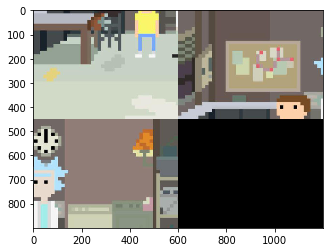

In [769]:
dimensiones=2
imagen_rand=inicio_roto_con_blanco(dimensiones)
plt.imshow(imagen_rand)

In [783]:
def juego_odamiento(numero_particiones,imagen_rand,pieza,direccion):        
    
    i=0
    j=0
    k=0
    imag_juego_partes =[]
    orden_ganar=[]
    longitud=int(numero_particiones*numero_particiones)
    orden=fun_orden_indices(longitud)    
    
    #fragmentamos la imagen    
    imagen_juego_arr = np.array(imagen_rand) # 900x1200 array
    imagen_juego_arr_horizontal=np.split(imagen_juego_arr,numero_particiones)
    for i in range(numero_particiones):        
        imagen_juego_arr_vertical_uno=np.hsplit(imagen_juego_arr_horizontal[i],numero_particiones)
        for j in range(numero_particiones): 
            imag_juego_partes.append(imagen_juego_arr_vertical_uno[j])
    
    im_en_partes=np.array(imag_juego_partes)
            
    #dicionario con etiquetas desordenadas
    if (numero_particiones==2):
        
        
        claves_val={
            str(orden[0]):0,
            str(orden[1]):1,
            str(orden[2]):2,
            str(orden[3]):3                     
        }
        #ordena el diccionrio con los valores actuales
        numeros_sort = sorted(claves_val.items())
        #almaceno valores ordenados
        for k in np.arange(longitud):
            orden_ganar.append(int(numeros_sort[k][1]))         
        print("orden Ganar",orden_ganar)
        
                
        #filas
        imagen_con_espacio_uno = np.concatenate((        
        im_en_partes[1],im_en_partes[2]        
        ),axis=1)
        
        #columnas
        imagen_con_espacio_dos = np.concatenate((        
        im_en_partes[0],im_en_partes[3]        
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos
        ))
    return imagen_espacios_completa_prub

orden Ganar [1, 2, 0, 3]
[2 0 1 3]


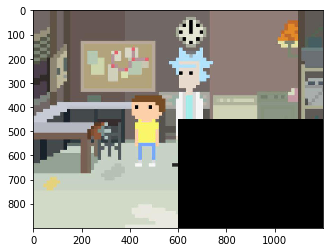

In [785]:
paul=juego_odamiento(2,imagen_rand,2,3)
print(vec_imagen_orig)
plt.imshow(paul)

In [772]:
def fun_orden_indices(valor):
    i=0
    j=0
    n=0
    indice_n=0
    numeros=np.arange(valor)
    vec_imagen_o=vec_imagen_orig
    vec_imagen=vec_imagen_o
        
    for i in range(valor):
        existe=numeros[i] in vec_imagen
        #print(existe)
        if(existe==False):
            n=numeros[i]
            v=vec_imagen!=valor
            #print(v)
            for j in range(len(v)):
                if(v[j]==False):
                    indice_n=j
    vec_imagen[indice_n]=n    
    return vec_imagen

In [775]:
#fun_orden_indices(4)

In [774]:
#print("Sorted array = ", np.sort(fun_orden(4)))